In [91]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [93]:
train.head(10)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,27,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,NaN
1,PAL0708,22,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,5000.0,FEMALE,7.63220,-25.46569,NaN
2,PAL0910,124,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,3875.0,MALE,9.59462,-25.42621,NaN
3,PAL0910,146,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,3650.0,MALE,9.22033,-26.03442,NaN
4,PAL0708,24,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,3800.0,MALE,9.28153,-24.97134,NaN
5,PAL0809,99,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N50A1,Yes,11/10/08,33.1,16.1,178.0,2900.0,FEMALE,9.04218,-26.15775,NaN
6,PAL0708,17,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N9A1,Yes,11/12/07,38.7,19.0,195.0,3450.0,FEMALE,9.18528,-25.06691,NaN
7,PAL0910,131,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N73A1,No,11/23/09,38.5,17.9,190.0,3325.0,FEMALE,8.98460,-25.57956,Nest never observed with full clutch.
8,PAL0708,9,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N35A1,Yes,11/27/07,43.3,13.4,209.0,4400.0,FEMALE,8.13643,-25.32176,NaN
9,PAL0708,38,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N24A2,Yes,11/16/07,42.2,18.5,180.0,3550.0,FEMALE,8.04787,-25.49523,NaN


In [94]:
from itertools import combinations

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for

#add all features
all_qual_cols = ["Clutch Completion", "Sex", "Island", "Region"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)
    #cols = ["Flipper Length (mm)", "Body Mass (g)", "Island_Dream", "Island_Torgersen"]

 

['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Body Mass (g)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Delta 15 N (o/oo)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Flipper Length (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Body Mass (g)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Flipper Length (mm)', 'Body Mass (g)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Flipper Length (mm)', 'Delta 1

In [95]:
from sklearn.linear_model import LogisticRegression

# this counts as 3 features because the two Clutch Completion 
# columns are transformations of a single original measurement. 
# you should find a way to automatically select some better columns
# as suggested in the code block above
cols = ["Flipper Length (mm)", "Body Mass (g)", "Island_Dream", "Island_Torgersen"]

LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)

/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.78125

In [96]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[cols], y_test)

0.6911764705882353

In [97]:
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np

In [98]:
def decision_region_panel(X, y, model, qual_features):  
  p = len(qual_features)
  fig, axarr = plt.subplots(1, p, figsize=(4*p,4))
  for i in range(p):

      filler_feature_values = {2+j: 0 for j in range(p)}

      filler_feature_values.update({2+i: 1})

      ix = X[qual_features[i]] == 1

      ax = axarr[i]

      plot_decision_regions(np.array(X[ix]), y[ix], clf=model,
                            filler_feature_values=filler_feature_values,
                            filler_feature_ranges={2+j: 0.1 for j in range(p)},
                            legend=2, ax=ax)

      ax.set_xlabel(X.columns[0])
      ax.set_ylabel(X.columns[1])

      handles, labels = ax.get_legend_handles_labels()
      ax.legend(handles, 
          ["Adelie", "Chinstrap", "Gentoo"], 
           framealpha=0.3, scatterpoints=1)

  # Adding axes annotations
  fig.suptitle(f'Accuracy = {model.score(X, y).round(3)}')
  plt.tight_layout()
  plt.show()

/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


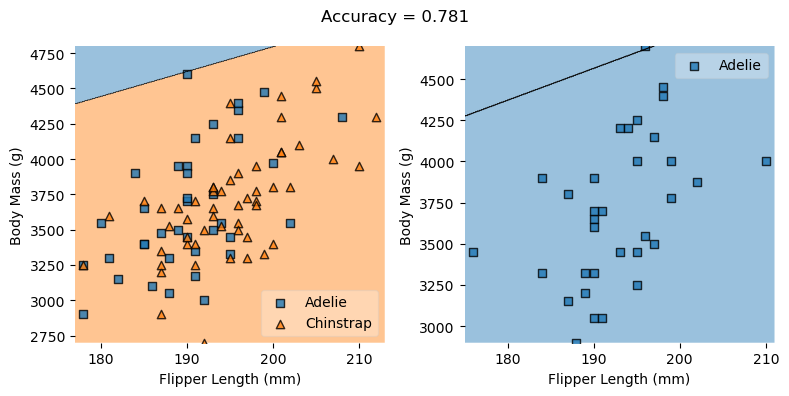

In [99]:
qual_features = ["Island_Dream", "Island_Torgersen"]
decision_region_panel(X_train[cols], y_train, LR, qual_features)

In [103]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty='l1', dual=False))),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
clf[:-1].get_feature_names_out()


/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Sex_MALE'],
      dtype=object)